# Statistical Machine Learning AM41ML

## Week 3 Classification, K-means Algorithm

# The objective of this third lab is to implement the K-means algorithm.

## Task 1 a
Construct your own artificial dataset. The dataset is compossed by $\sum_{i=1}^rN_i=N=500$ vectors $\boldsymbol{x}\in\mathbb{R}^2$, such that the components are drawn from $M$ different Gaussian distributions. You may consider all clusters of equal size ($N_i=500/M$).


Hint: Use the library NumPy https://numpy.org/

## Task 1 b

Make a plot y vs x of the data set.

Hint: Use the library PyPlot https://matplotlib.org/

## Task 1 c

Merge all data points into one set and plot it.


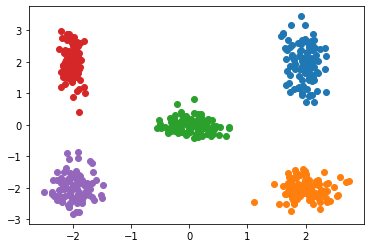

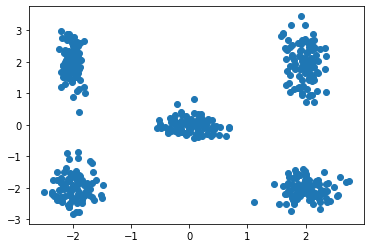

In [1]:
################
### Task 1 a ###
################

import numpy as np                        # Imports NumPy
def datai(mx,my,sx,sy,N):                 # Function data(mx,my,s) constructs N bivariate Gaussian deviates centered at (mx,my) with std s
    ex = np.random.normal(0, sx, N)       # Noise array in x
    ey = np.random.normal(0, sy, N)       # Noise array in y
    x  = mx + ex                          # Array of the first coordinate
    y  = my + ey                          # Array of the second coordinate
    return(x,y)                           # The function returns two arrays of dim N.

x1 , y1 = datai(2  ,2  ,0.2,0.6,100)      # First cluster
x2 , y2 = datai(2,-2,0.3,0.3,100)         # Second cluster
x3 , y3 = datai(0  ,0  ,0.3,0.2,100)      # Third cluster
x4 , y4 = datai(-2,2  ,0.1,0.5,100)       # Fourth cluster
x5 , y5 = datai(-2  ,-2  ,0.2,0.4,100)    # Fifth cluster

#Alternative way to generate a random sample in two dimensions
#mu  = np.array([0.0, 0.0])
#cov = np.array([[1, 0.3], [0.3, 1]])
#vec = np.random.multivariate_normal(mu, cov, 100)

################
### Task 1 b ###
################

import matplotlib.pyplot as plt           # Imports PyPlot          
plt.scatter(x1,y1)                        # Simplest possible scatter points plot y vs x (Feel free to improve this plot)
plt.scatter(x2,y2)                        # Simplest possible scatter points plot y vs x (Feel free to improve this plot)
plt.scatter(x3,y3)                        # Simplest possible scatter points plot y vs x (Feel free to improve this plot)
plt.scatter(x4,y4)                        # Simplest possible scatter points plot y vs x (Feel free to improve this plot)
plt.scatter(x5,y5)                        # Simplest possible scatter points plot y vs x (Feel free to improve this plot)
plt.show()                                # Show

################
### Task 1 c ###
################

xx = np.concatenate((x1,x2,x3,x4,x5))     # Merges all first components into one set
yy = np.concatenate((y1,y2,y3,y4,y5))     # Merges all second components into one set

plt.scatter(xx,yy)                        # Plot
plt.show()

## Task 2 a
Compute the k-means algorithm.
## Task 2 b
Plot your results for $k=2,\dots,10$.

Hint: Use random.py to help you with the initial condition. https://docs.python.org/3/library/random.html

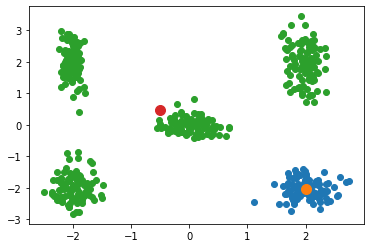

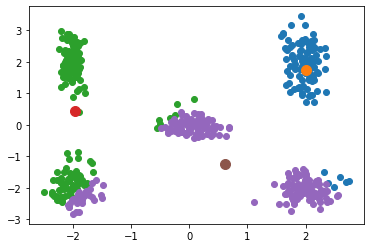

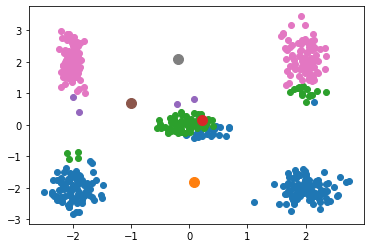

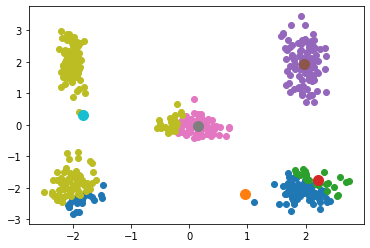

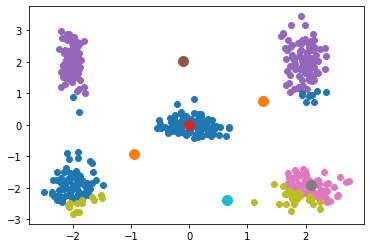

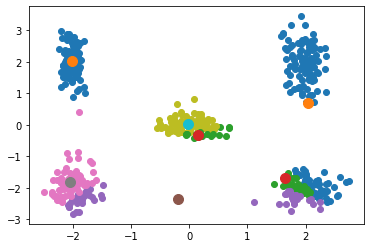

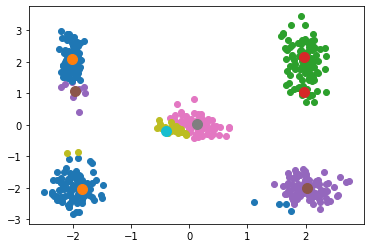

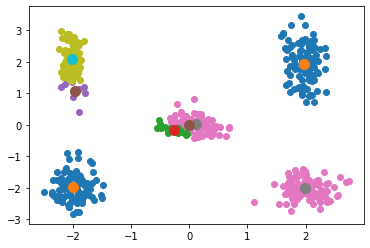

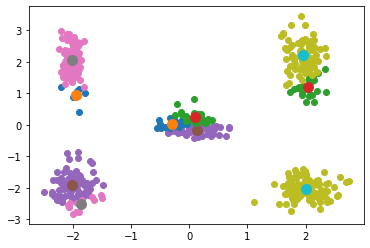

In [2]:
################
### Task 2 a ###
################

import random as rnd
def kmn(k,X,Y,Nit):                                          # Function kmn(k) constructs k clusters centered initially at random elements of the set (X,Y) 
                                                             # Nit is the number of iterations of the procedure
    mx  = sum(X) / len(X)
    sx  = np.sqrt(abs(sum(X **2 ) / len(X) - mx ** 2))    
    my  = sum(Y) / len(Y)
    sy  = np.sqrt(abs(sum(Y **2 ) / len(Y) - my ** 2))    
    Mx  = np.zeros(k)                                        # Define the array for the x-positions of the first k-prototypes
    My  = np.zeros(k)                                        # Define the array for the y-positions of the first k-prototypes
    
    for i in range(0,k):                                     # Fill in the Mx and My arrays with the randomly chosen data points
        Mx[i] = mx + rnd.uniform(-sx,sx) / 1
        My[i] = my + rnd.uniform(-sy,sy) / 1

    szx = np.size(X)                                         # Measures the size of the data set
        
    for it in range(0,Nit):                                  # Main iteration of the k-means algorithm
        
        Classes = []                                         # Construct and empty list

        for i in range(0,k):
            Classes.append([])                               # Stores k empty lists inside the first list. Inside each list will be plased the index of a
                                                             # datum correspondent to that class
        for n in range(0,szx):                               # Loop in data points
            distance = np.zeros(k)                           # Vector where the distance of the data points to the prototypes is stored
            for i in range(0,k):                             # Loop in classes
                distance[i] = (Mx[i] - X[n]) ** 2 + (My[i] - Y[n]) ** 2  # Computation of the Euclidian distance
            dd = distance[0]
            kk = 0
            for i in range(0,k):
                if dd > distance[i]:
                    kk = i
                    dd = distance[i]
                
            Classes[kk].append(n)                            # the closest, and then the index of the datum is stored in the correspondent class
    
        Mx = np.zeros(k)                                     # Recomputation of the prototypes as the arithmetic means inside each class
        My = np.zeros(k)
        for i in range(0,k):
            for n in Classes[i]:
                Mx[i] = Mx[i] + X[n]
                My[i] = My[i] + Y[n]
            Mx[i] = Mx[i] / max(1,np.size(Classes[i]))
            My[i] = My[i] / max(1,np.size(Classes[i]))
        
        
################
### Task 2 b ###
################

        return(Mx,My,Classes)                                 # Returns the coordinates of the prototypes and the indeces of each class
        
Mx2  , My2  , C2  = kmn(2,xx,yy,100)                           # K=2
Mx3  , My3  , C3  = kmn(3,xx,yy,100)                           # K=3
Mx4  , My4  , C4  = kmn(4,xx,yy,100)                           # K=4
Mx5  , My5  , C5  = kmn(5,xx,yy,100)                           # K=5
Mx6  , My6  , C6  = kmn(6,xx,yy,100)                           # K=6
Mx7  , My7  , C7  = kmn(7,xx,yy,100)                           # K=7
Mx8  , My8  , C8  = kmn(8,xx,yy,100)                           # K=8
Mx9  , My9  , C9  = kmn(9,xx,yy,100)                           # K=9
Mx10 , My10 , C10 = kmn(10,xx,yy,100)                          # K=10

for i in range(0,2):                                  # Plot of the scattered points in each class
    plt.scatter(xx[C2[i]],yy[C2[i]]) 
    plt.scatter(Mx2[i],My2[i],100)   
plt.show()                                
for i in range(0,3):                                  # Plot of the scattered points in each class
    plt.scatter(xx[C3[i]],yy[C3[i]]) 
    plt.scatter(Mx3[i],My3[i],100)   
plt.show()                                
for i in range(0,4):                                  # Plot of the scattered points in each class
    plt.scatter(xx[C4[i]],yy[C4[i]]) 
    plt.scatter(Mx4[i],My4[i],100)   
plt.show()                                
for i in range(0,5):                                  # Plot of the scattered points in each class
    plt.scatter(xx[C5[i]],yy[C5[i]]) 
    plt.scatter(Mx5[i],My5[i],100)   
plt.show()                                
for i in range(0,6):                                  # Plot of the scattered points in each class
    plt.scatter(xx[C6[i]],yy[C6[i]]) 
    plt.scatter(Mx6[i],My6[i],100)   
plt.show()                                
for i in range(0,7):                                  # Plot of the scattered points in each class
    plt.scatter(xx[C7[i]],yy[C7[i]]) 
    plt.scatter(Mx7[i],My7[i],100)   
plt.show()                                
for i in range(0,8):                                  # Plot of the scattered points in each class
    plt.scatter(xx[C8[i]],yy[C8[i]]) 
    plt.scatter(Mx8[i],My8[i],100)   
plt.show()                                
for i in range(0,9):                                  # Plot of the scattered points in each class
    plt.scatter(xx[C9[i]],yy[C9[i]]) 
    plt.scatter(Mx9[i],My9[i],100)   
plt.show()                                
for i in range(0,10):                                  # Plot of the scattered points in each class
    plt.scatter(xx[C10[i]],yy[C10[i]]) 
    plt.scatter(Mx10[i],My10[i],100)   
plt.show()                                


## Task 3 a
Compute the quadratic error for each one of your results
## Task 3 b
Plot the errors for $k=2,\dots,10$. Use the 'elbow method' to determine which k better classifies the data


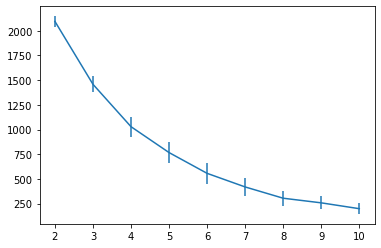

In [3]:
################
### Task 3 a ###
################

def TE(cx,cy,ind):                               # Function TE(cx,cy,ind) computs the distance between prototypes and points in the class
    e = 0                                        # Error
    L = len(ind)
    k = 0
    while k < L: 
        for i in ind[k]:                                          # Loop in datapoints
            e = e + (xx[i] - cx[k]) ** 2 + (yy[i] - cy[k]) ** 2   # Increment in Error
        k = k + 1
    return(e)                                                     # Returns the training error

################
### Task 3 b ###
################

kx = [2,3,4,5,6,7,8,9,10]
ky = [0,0,0,0,0,0,0,0,0]
sy = [0,0,0,0,0,0,0,0,0]
def stat(k):
    mmu = 0
    ssg = 0
    for i in range(10):
        mu = 0
        sg = 0
        for j in range(100):
            xxx , yyy , ccc = kmn(k,xx,yy,100)
            ee              = TE(xxx,yyy,ccc)
            mu = mu + ee
            sg = sg + ee ** 2
        mu = mu / 100
        sg = sg / 100 - mu ** 2
        mmu = mmu + mu
        ssg = ssg + sg
    mmu = mmu / 10
    ssg = np.sqrt(abs(ssg / 90))
    return(mmu,ssg)

ky[0] , sy[0]  = stat(2) 
ky[1] , sy[1]  = stat(3) 
ky[2] , sy[2]  = stat(4) 
ky[3] , sy[3]  = stat(5) 
ky[4] , sy[4]  = stat(6) 
ky[5] , sy[5]  = stat(7) 
ky[6] , sy[6]  = stat(8) 
ky[7] , sy[7]  = stat(9) 
ky[8] , sy[8]  = stat(10) 

plt.errorbar(kx,ky,sy)  
plt.show()                                # Show




## Task 4 a
Compute the k-means++ algorithm. Observe the difference in performance with the normal k-means.
## Task 4 b
Plot your results for $k=2,\dots,10$.


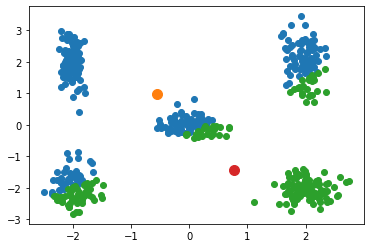

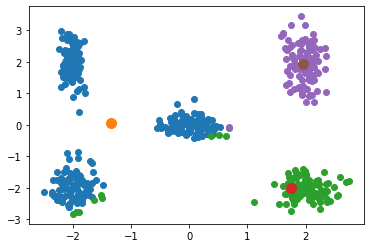

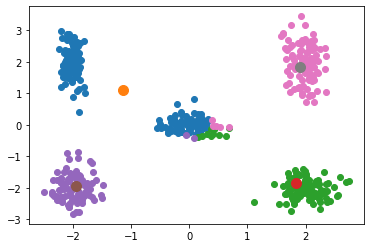

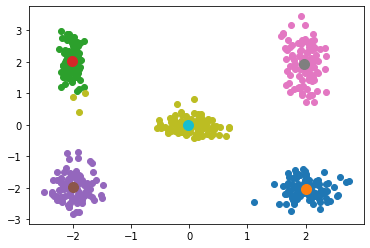

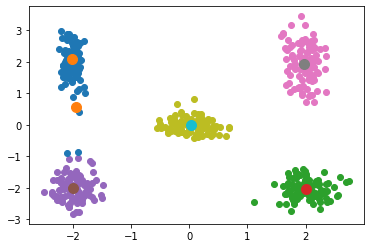

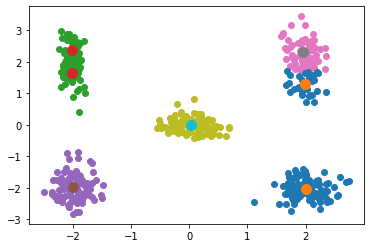

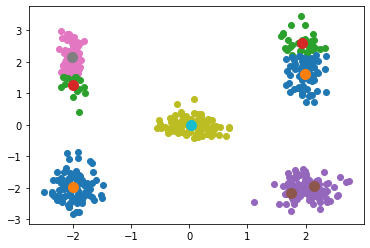

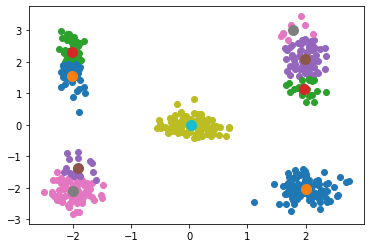

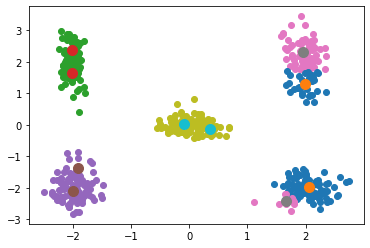

In [4]:
################
### Task 4 a ###
################

import random as rnd
def kmnpp(k,X,Y,Nit):                                        # Function kmnpp(k) constructs k clusters centered initially at random elements of the set (X,Y) 
                                                             # Nit is the number of iterations of the procedure
    ii = rnd.randint(0,len(X) - 1)
    Mx = []                                               
    My = []                                               
    Mx.append(X[ii])
    My.append(Y[ii])
    
    lista = [ii]
    for i in range(k - 1):
        dist = []
        for n in range(0,len(X)):
            d = 10000
            for kk in range(len(Mx)):
                temp_dist = np.sqrt((X[n] - Mx[kk]) ** 2 + (Y[n] - My[kk]) ** 2)
                d = min(d , temp_dist)
            dist.append(d)
        rmax = max(dist)
        imax = np.where(dist == rmax)[0][0]
        lista.append(imax)
        Mx.append(X[imax])
        My.append(Y[imax])
    
    szx = np.size(X)                                         # Measures the size of the data set
        
    for it in range(0,Nit):                                  # Main iteration of the k-means algorithm
        
        Classes = []                                         # Construct and empty list

        for i in range(0,k):
            Classes.append([])                               # Stores k empty lists inside the first list. Inside each list will be plased the index of a
                                                             # datum correspondent to that class
        for n in range(0,szx):                               # Loop in data points
            distance = np.zeros(k)                           # Vector where the distance of the data points to the prototypes is stored
            for i in range(0,k):                             # Loop in classes
                distance[i] = (Mx[i] - X[n]) ** 2 + (My[i] - Y[n]) ** 2  # Computation of the Euclidian distance
            dd = distance[0]
            kk = 0
            for i in range(0,k):
                if dd > distance[i]:
                    kk = i
                    dd = distance[i]
                
            Classes[kk].append(n)                            # the closest, and then the index of the datum is stored in the correspondent class
    
        Mx = np.zeros(k)                                     # Recomputation of the prototypes as the arithmetic means inside each class
        My = np.zeros(k)
        for i in range(0,k):
            for n in Classes[i]:
                Mx[i] = Mx[i] + X[n]
                My[i] = My[i] + Y[n]
            Mx[i] = Mx[i] / max(1,np.size(Classes[i]))
            My[i] = My[i] / max(1,np.size(Classes[i]))
        
        
################
### Task 4 b ###
################

        return(Mx,My,Classes)                                 # Returns the coordinates of the prototypes and the indeces of each class
        
Mx2  , My2  , C2  = kmnpp(2,xx,yy,10)                           # K=2
Mx3  , My3  , C3  = kmnpp(3,xx,yy,10)                           # K=3
Mx4  , My4  , C4  = kmnpp(4,xx,yy,10)                           # K=4
Mx5  , My5  , C5  = kmnpp(5,xx,yy,10)                           # K=5
Mx6  , My6  , C6  = kmnpp(6,xx,yy,10)                           # K=6
Mx7  , My7  , C7  = kmnpp(7,xx,yy,10)                           # K=7
Mx8  , My8  , C8  = kmnpp(8,xx,yy,10)                           # K=8
Mx9  , My9  , C9  = kmnpp(9,xx,yy,10)                           # K=9
Mx10 , My10 , C10 = kmnpp(10,xx,yy,10)                          # K=10

for i in range(0,2):                                  # Plot of the scattered points in each class
    plt.scatter(xx[C2[i]],yy[C2[i]]) 
    plt.scatter(Mx2[i],My2[i],100)   
plt.show()                                
for i in range(0,3):                                  # Plot of the scattered points in each class
    plt.scatter(xx[C3[i]],yy[C3[i]]) 
    plt.scatter(Mx3[i],My3[i],100)   
plt.show()                                
for i in range(0,4):                                  # Plot of the scattered points in each class
    plt.scatter(xx[C4[i]],yy[C4[i]]) 
    plt.scatter(Mx4[i],My4[i],100)   
plt.show()                                
for i in range(0,5):                                  # Plot of the scattered points in each class
    plt.scatter(xx[C5[i]],yy[C5[i]]) 
    plt.scatter(Mx5[i],My5[i],100)   
plt.show()                                
for i in range(0,6):                                  # Plot of the scattered points in each class
    plt.scatter(xx[C6[i]],yy[C6[i]]) 
    plt.scatter(Mx6[i],My6[i],100)   
plt.show()                                
for i in range(0,7):                                  # Plot of the scattered points in each class
    plt.scatter(xx[C7[i]],yy[C7[i]]) 
    plt.scatter(Mx7[i],My7[i],100)   
plt.show()                                
for i in range(0,8):                                  # Plot of the scattered points in each class
    plt.scatter(xx[C8[i]],yy[C8[i]]) 
    plt.scatter(Mx8[i],My8[i],100)   
plt.show()                                
for i in range(0,9):                                  # Plot of the scattered points in each class
    plt.scatter(xx[C9[i]],yy[C9[i]]) 
    plt.scatter(Mx9[i],My9[i],100)   
plt.show()                                
for i in range(0,10):                                  # Plot of the scattered points in each class
    plt.scatter(xx[C10[i]],yy[C10[i]]) 
    plt.scatter(Mx10[i],My10[i],100)   
plt.show()                                


## Task 5

Plot the errors for $k=2,\dots,10$. Use the 'elbow method' to determine which k better classifies the data


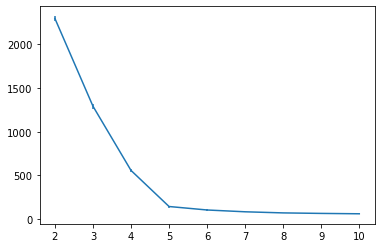

In [5]:
##############
### Task 5 ###
##############

kx = [2,3,4,5,6,7,8,9,10]
ky = [0,0,0,0,0,0,0,0,0]
sy = [0,0,0,0,0,0,0,0,0]
def statpp(k):
    mmu = 0
    ssg = 0
    for i in range(10):
        mu = 0
        sg = 0
        for j in range(100):
            xxx , yyy , ccc = kmnpp(k,xx,yy,10)
            ee              = TE(xxx,yyy,ccc)
            mu = mu + ee
            sg = sg + ee ** 2
        mu = mu / 100
        sg = sg / 100 - mu ** 2
        mmu = mmu + mu
        ssg = ssg + sg
    mmu = mmu / 10
    ssg = np.sqrt(abs(ssg / 90))
    return(mmu,ssg)

ky[0] , sy[0]  = statpp(2) 
ky[1] , sy[1]  = statpp(3) 
ky[2] , sy[2]  = statpp(4) 
ky[3] , sy[3]  = statpp(5) 
ky[4] , sy[4]  = statpp(6) 
ky[5] , sy[5]  = statpp(7) 
ky[6] , sy[6]  = statpp(8) 
ky[7] , sy[7]  = statpp(9) 
ky[8] , sy[8]  = statpp(10) 

plt.errorbar(kx,ky,sy)  
plt.show()                                # Show




## Task 6

Compute and plot the similarity measure


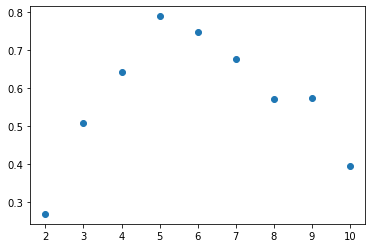

In [6]:
##############
### Task 6 ###
##############

def sil(mx,my,clas,X,Y):
    si = []
    for k1 in range(len(clas)):
        for i in clas[k1]:
            a = 0
            b = []
            for j in clas[k1]:
                a = a + np.sqrt((X[i] - X[j]) ** 2 + (Y[i] - Y[j]) ** 2)
            a = a / (len(clas[k1]) - 1)
            for k2 in range(len(clas)):
                if k2 != k1:
                    c = 0
                    for j in clas[k2]:
                        c = c + np.sqrt((X[i] - X[j]) ** 2 + (Y[i] - Y[j]) ** 2)
                    b.append(c / len(clas[k2]))
            bm = min(b)
            si.append((bm - a)/max(a,bm))
    return(sum(si) / len(X))

kx = [2,3,4,5,6,7,8,9,10]
ky = [0,0,0,0,0,0,0,0,0]
sy = [0,0,0,0,0,0,0,0,0]

def statss(k):
    mmu = 0
    ssg = 0
    for i in range(10):
        mu = 0
        sg = 0
        for j in range(100):
            xxx , yyy , ccc = kmnpp(k,xx,yy,10)
            ee              = sil(xxx,yyy,ccc,xx,yy)
            mu = mu + ee
            sg = sg + ee ** 2
        mu = mu / 100
        sg = sg / 100 - mu ** 2
        mmu = mmu + mu
        ssg = ssg + sg
    mmu = mmu / 10
    ssg = np.sqrt(abs(ssg / 90))
    return(mmu,ssg)

#ky[0] , sy[0]  = statss(2) 
#ky[1] , sy[1]  = statss(3) 
#ky[2] , sy[2]  = statss(4) 
#ky[3] , sy[3]  = statss(5) 
#ky[4] , sy[4]  = statss(6) 
#ky[5] , sy[5]  = statss(7) 
#ky[6] , sy[6]  = statss(8) 
#ky[7] , sy[7]  = statss(9) 
#ky[8] , sy[8]  = statss(10) 

#plt.errorbar(kx,ky,sy)  
#plt.show()                                # Show

ky[0]  = sil(Mx2,My2,C2,xx,yy)
ky[1]  = sil(Mx3,My3,C3,xx,yy)
ky[2]  = sil(Mx4,My4,C4,xx,yy)
ky[3]  = sil(Mx5,My5,C5,xx,yy) 
ky[4]  = sil(Mx6,My6,C6,xx,yy)
ky[5]  = sil(Mx7,My7,C7,xx,yy)
ky[6]  = sil(Mx8,My8,C8,xx,yy)
ky[7]  = sil(Mx9,My9,C9,xx,yy)
ky[8]  = sil(Mx10,My10,C10,xx,yy)

plt.scatter(kx,ky)  
plt.show()                                # Show

    